In [ ]:
from google.colab import files
files.upload()

In [2]:
# Copying kaggle.json to .kaggle directory
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Listing Kaggle Comeptitions
!kaggle competitions list

In [ ]:
!kaggle datasets list

In [ ]:
# Downloading Titanic Dataset from Kaggle
!kaggle competitions download -c titanic

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
# Reading test.csv and train.csv
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')

In [9]:
raw_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
raw_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
# Description of Training Data
raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Description of Test Data
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [15]:
# Shape of the data
raw_train.shape , raw_test.shape

((891, 12), (418, 11))

In [16]:
# Dropping Cabin, Name and Ticket columns from training and test sets
raw_train = raw_train.drop('Cabin', axis=1)
raw_train = raw_train.drop('Name', axis=1)
raw_train = raw_train.drop('Ticket', axis=1)

raw_test = raw_test.drop('Cabin', axis=1)
raw_test = raw_test.drop('Name', axis=1)
raw_test = raw_test.drop('Ticket', axis=1)

In [17]:
# One Hot Encoding Sex, Embarked and PClass in both training and test sets
raw_train = pd.get_dummies(raw_train, columns=["Sex", "Embarked", "Pclass"])
raw_test = pd.get_dummies(raw_test, columns=["Sex", "Embarked", "Pclass"])

In [18]:
# Displaying the encoded data
raw_train

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,0,1,0,1,0
887,888,1,19.0,0,0,30.0000,1,0,0,0,1,1,0,0
888,889,0,NaN,1,2,23.4500,1,0,0,0,1,0,0,1
889,890,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0


In [19]:
raw_test

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,893,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,895,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,896,22.0,1,1,12.2875,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0,0,8.0500,0,1,0,0,1,0,0,1
414,1306,39.0,0,0,108.9000,1,0,1,0,0,1,0,0
415,1307,38.5,0,0,7.2500,0,1,0,0,1,0,0,1
416,1308,NaN,0,0,8.0500,0,1,0,0,1,0,0,1


In [20]:
# Normalising Age, SibSp, Fare and Parch in both Training and Test Data
raw_train["Age"] = raw_train["Age"]/raw_train["Age"].max()
raw_train["SibSp"] = raw_train["SibSp"]/raw_train["SibSp"].max()
raw_train["Fare"] = raw_train["Fare"]/raw_train["Fare"].max()
raw_train["Parch"] = raw_train["Parch"]/raw_train["Parch"].max()

raw_test["Age"] = raw_test["Age"]/raw_test["Age"].max()
raw_test["SibSp"] = raw_test["SibSp"]/raw_test["SibSp"].max()
raw_test["Fare"] = raw_test["Fare"]/raw_test["Fare"].max()
raw_test["Parch"] = raw_test["Parch"]/raw_test["Parch"].max()

In [21]:
# Seeing the normalised data
raw_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,0.2750,0.125,0.0,0.014151,0,1,0,0,1,0,0,1
1,2,1,0.4750,0.125,0.0,0.139136,1,0,1,0,0,1,0,0
2,3,1,0.3250,0.000,0.0,0.015469,1,0,0,0,1,0,0,1
3,4,1,0.4375,0.125,0.0,0.103644,1,0,0,0,1,1,0,0
4,5,0,0.4375,0.000,0.0,0.015713,0,1,0,0,1,0,0,1


In [22]:
# Seeing the normalised test data
raw_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,0.453947,0.000,0.000000,0.015282,0,1,0,1,0,0,0,1
1,893,0.618421,0.125,0.000000,0.013663,1,0,0,0,1,0,0,1
2,894,0.815789,0.000,0.000000,0.018909,0,1,0,1,0,0,1,0
3,895,0.355263,0.000,0.000000,0.016908,0,1,0,0,1,0,0,1
4,896,0.289474,0.125,0.111111,0.023984,1,0,0,0,1,0,0,1


In [23]:
# Checking the total missing values in training data
raw_train.isnull().sum()

PassengerId      0
Survived         0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
dtype: int64

In [25]:
# There is a lot of missing values in Age
# We will replace it with the mean age
raw_train['Age'] = raw_train['Age'].fillna(raw_train['Age'].mean())

In [27]:
# Dropping the Passenger ID Column as it is not needed in training
raw_train = raw_train.drop('PassengerId', axis=1)

In [28]:
# Making X_train and y_train
X_train = raw_train.drop("Survived", axis=1)
y_train = raw_train["Survived"]

In [29]:
X_train , y_train

(          Age  SibSp     Parch  ...  Pclass_1  Pclass_2  Pclass_3
 0    0.275000  0.125  0.000000  ...         0         0         1
 1    0.475000  0.125  0.000000  ...         1         0         0
 2    0.325000  0.000  0.000000  ...         0         0         1
 3    0.437500  0.125  0.000000  ...         1         0         0
 4    0.437500  0.000  0.000000  ...         0         0         1
 ..        ...    ...       ...  ...       ...       ...       ...
 886  0.337500  0.000  0.000000  ...         0         1         0
 887  0.237500  0.000  0.000000  ...         1         0         0
 888  0.371239  0.125  0.333333  ...         0         0         1
 889  0.325000  0.000  0.000000  ...         1         0         0
 890  0.400000  0.000  0.000000  ...         0         0         1
 
 [891 rows x 12 columns], 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [30]:
# MODEL

# Random Seed
tf.random.set_seed(42)

# 1. Create the model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(8, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the Model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the Model
history = model.fit(X_train, y_train, epochs = 250)

Epoch 1/250
28/28 [==============================] - 1s 1ms/step - loss: 0.6700 - accuracy: 0.6891
Epoch 2/250
28/28 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.7924
Epoch 3/250
28/28 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.8081
Epoch 4/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.8126
Epoch 5/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.8159
Epoch 6/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.8159
Epoch 7/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.8058
Epoch 8/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.8081
Epoch 9/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8137
Epoch 10/250
28/28 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8159
Epoch 11/

In [31]:
# We are getting an accuracy of around 85% on the training data
model.evaluate(X_train, y_train)

28/28 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8575


[0.34008267521858215, 0.857463538646698]

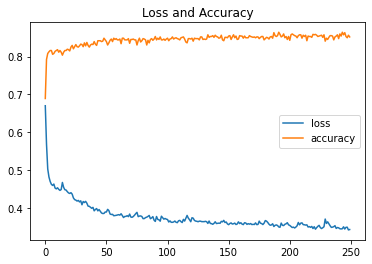

In [32]:
# Plotting the Loss and Accuracy over 250 epochs
pd.DataFrame(history.history).plot(title="Loss and Accuracy")

In [33]:
# Now let's make predictions on the test data which we will then upload to Kaggle
X_test = raw_test.drop("PassengerId", axis=1)
PassengerId = raw_test["PassengerId"]

In [36]:
# X_test still has some missing data
X_test.isnull().sum()

Age           86
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64

In [39]:
# Putting Mean of Age and Fare
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].mean())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].mean())

In [40]:
# No missing data yayy
X_test.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [43]:
# X_test is now ready to go into the model and give us the predictions
y_probs = model.predict(X_test) # probs is prediction probabilities

# Converting all prediction probabilities to integers
y_preds = y_probs.round()
y_preds[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [50]:
# We now have the predictions on the test data
# Let's create a gender_submission.csv as mentioned in the Kaggle Website
output_df = pd.DataFrame(data=PassengerId, columns=["PassengerId"])
output_df["Survived"] = y_preds.astype(int)

In [51]:
output_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [52]:
# Converting the data frame to csv for uploading to Kaggle
output_df.to_csv('gender_submission.csv',index=False)

In [ ]:
# Submitting the csv file we created to Kaggle Competition
!kaggle competitions submit -c titanic -f /content/gender_submission.csv -m Submission_1